In [1]:
import pandas as pd
import numpy as np
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('amazon_sales_data 2025.csv')
data.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [4]:
def change_to_date(column):
    data[column] = pd.to_datetime(data[column],infer_datetime_format=True)
    

In [5]:
for i in ['Date']:
    change_to_date(i)

In [6]:
data.dtypes

Order ID                     object
Date                 datetime64[ns]
Product                      object
Category                     object
Price                         int64
Quantity                      int64
Total Sales                   int64
Customer Name                object
Customer Location            object
Payment Method               object
Status                       object
dtype: object

In [7]:
data['date'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [8]:
data.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,date,Month,Year
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled,14,3,2025
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending,20,3,2025
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled,15,2,2025
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending,19,2,2025
4,ORD0005,2025-10-03,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending,3,10,2025


In [9]:
data.drop(['Order ID','Date'],axis=1,inplace=True)

In [10]:
data.head()

,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,date,Month,Year
0,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled,14,3,2025
1,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending,20,3,2025
2,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled,15,2,2025
3,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending,19,2,2025
4,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending,3,10,2025


In [11]:
print(data['Product'].unique())
print(data['Category'].unique())
print(data['Customer Name'].unique())
print(data['Customer Location'].unique())
print(data['Payment Method'].unique())
print(data['Status'].unique())

['Running Shoes' 'Headphones' 'Smartwatch' 'T-Shirt' 'Smartphone' 'Book'
 'Jeans' 'Laptop' 'Washing Machine' 'Refrigerator']
['Footwear' 'Electronics' 'Clothing' 'Books' 'Home Appliances']
['Emma Clark' 'Emily Johnson' 'John Doe' 'Olivia Wilson' 'Sophia Miller'
 'David Lee' 'Michael Brown' 'Daniel Harris' 'Chris White' 'Jane Smith']
['New York' 'San Francisco' 'Denver' 'Dallas' 'Houston' 'Miami' 'Boston'
 'Seattle' 'Los Angeles' 'Chicago']
['Debit Card' 'Amazon Pay' 'Credit Card' 'PayPal' 'Gift Card']
['Cancelled' 'Pending' 'Completed']


In [12]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
ss = StandardScaler()

In [13]:
cat = data.select_dtypes(include='object').columns

In [14]:
for i in cat:
    data[i] = le.fit_transform(data[i])

In [15]:
data.head()

,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status,date,Month,Year
0,5,3,60,3,180,4,7,2,0,14,3,2025
1,1,2,100,4,400,3,8,2,2,20,3,2025
2,5,3,60,2,120,6,3,0,0,15,2,2025
3,5,3,60,3,180,8,2,1,2,19,2,2025
4,7,2,150,3,450,4,7,2,2,3,10,2025


In [16]:
data.dtypes

Product              int32
Category             int32
Price                int64
Quantity             int64
Total Sales          int64
Customer Name        int32
Customer Location    int32
Payment Method       int32
Status               int32
date                 int32
Month                int32
Year                 int32
dtype: object

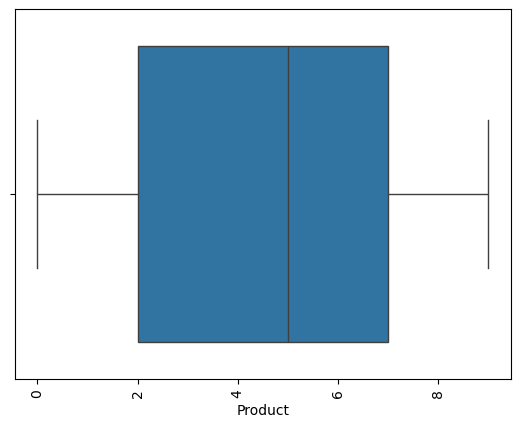

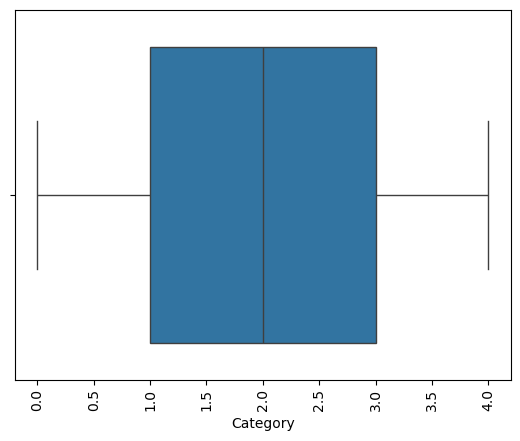

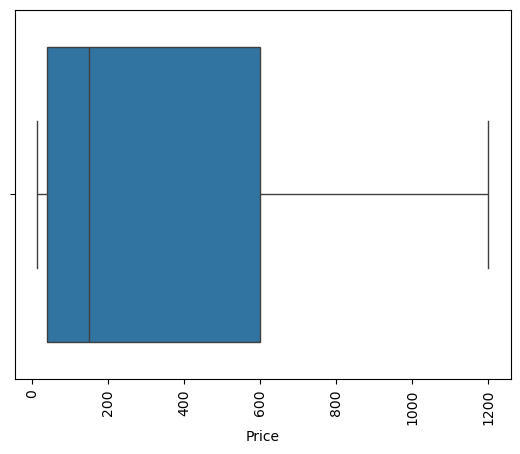

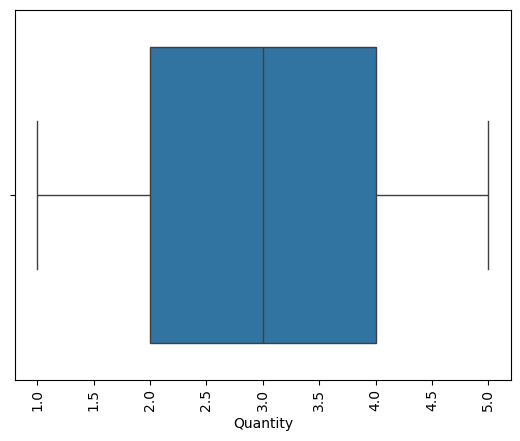

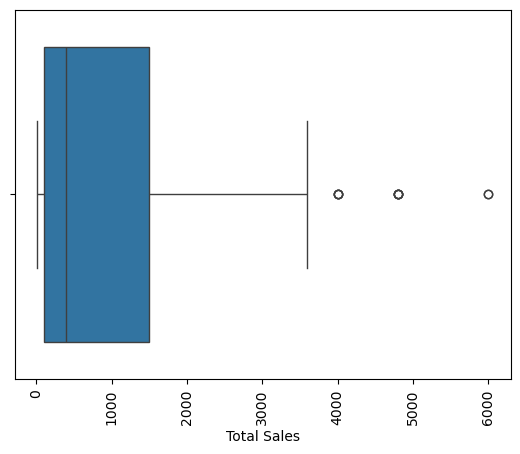

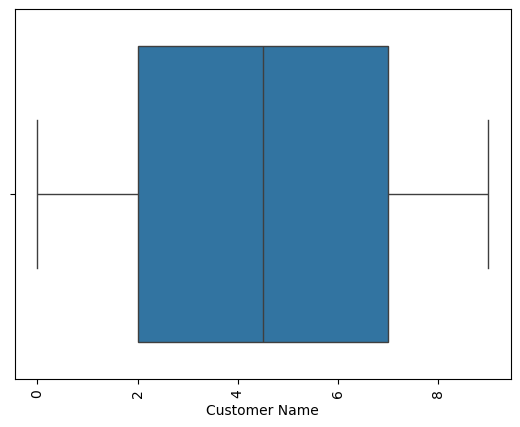

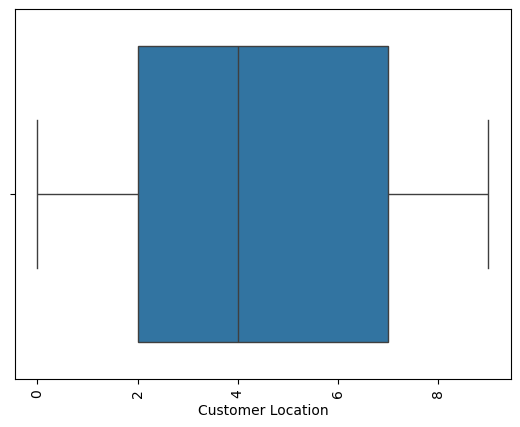

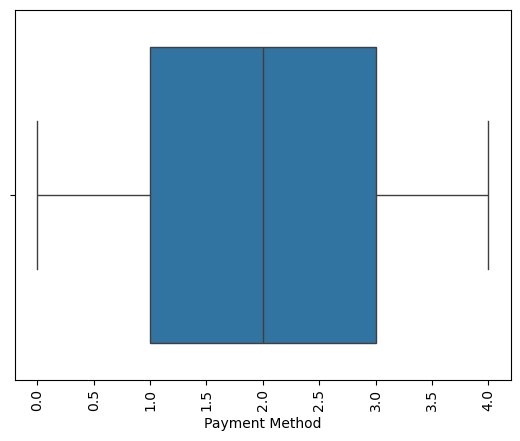

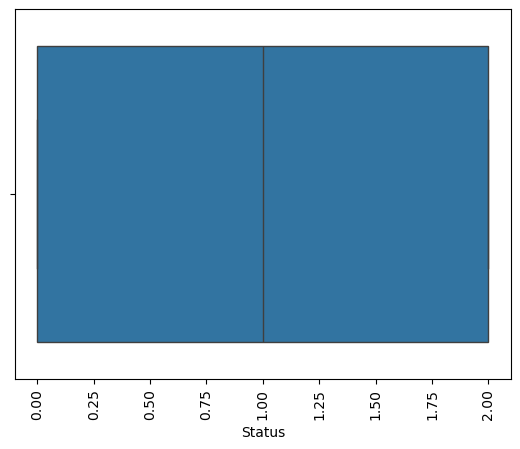

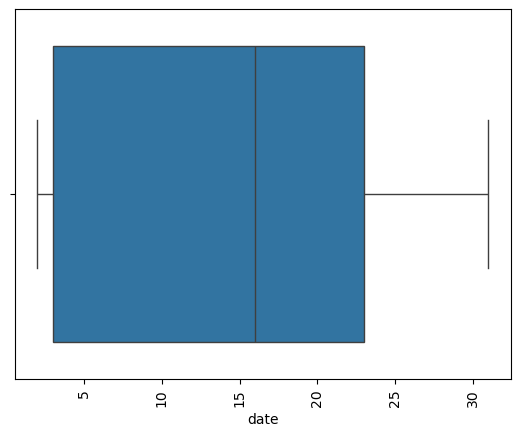

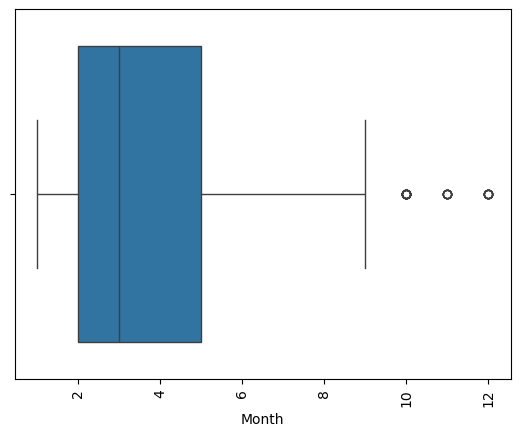

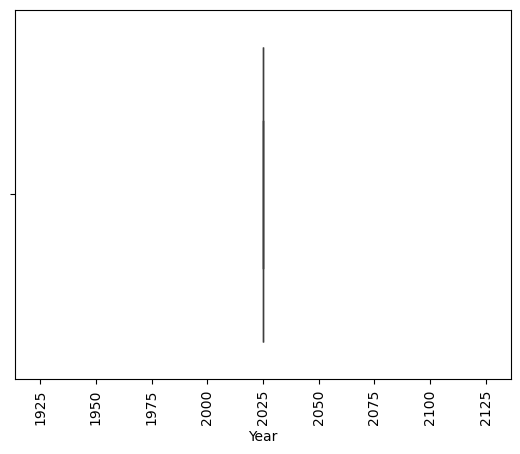

In [17]:
for i in data.select_dtypes(include=['number']).columns:
    sns.boxplot(data=data,x=i)
    plt.xticks(rotation = 90)
    plt.show()

In [18]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [19]:
for i in ['Total Sales','Month']:
    lw,uw=wisker(data[i])
    data[i]=np.where(data[i]<lw,lw,data[i])
    data[i]=np.where(data[i]>uw,uw,data[i])

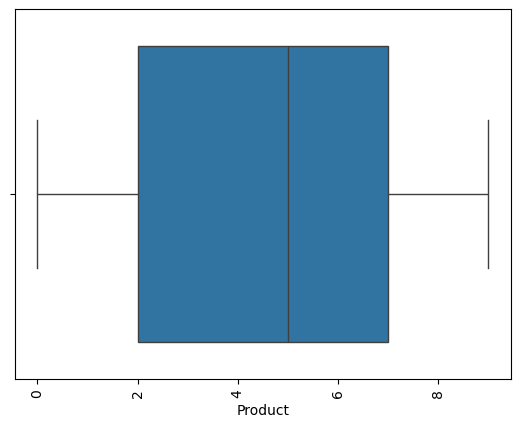

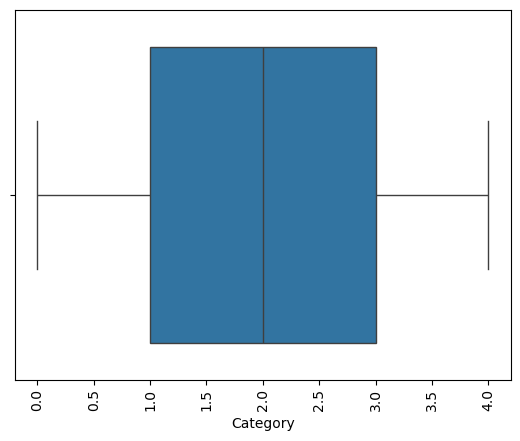

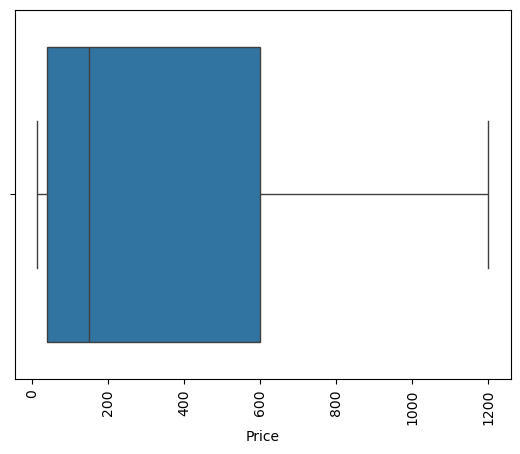

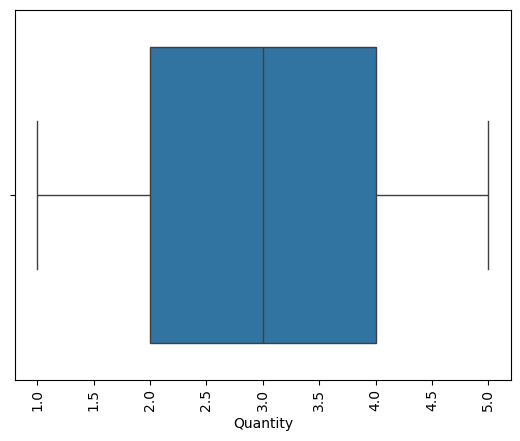

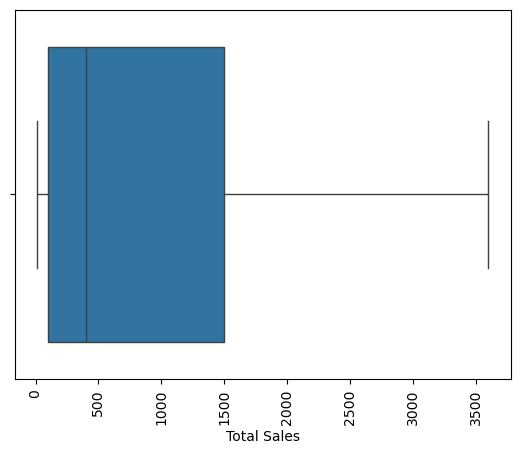

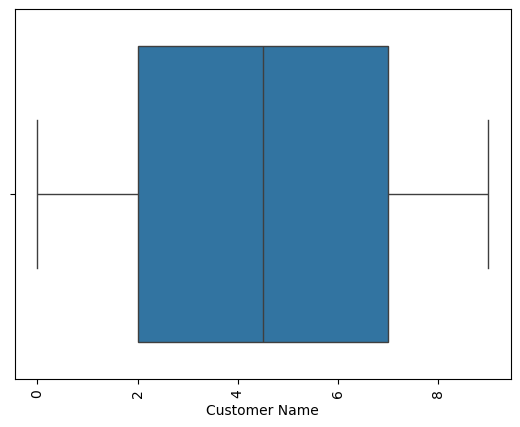

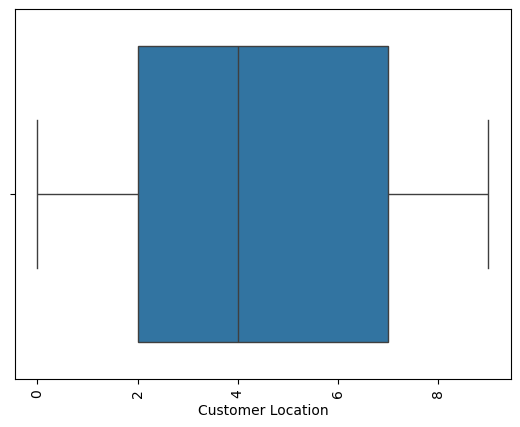

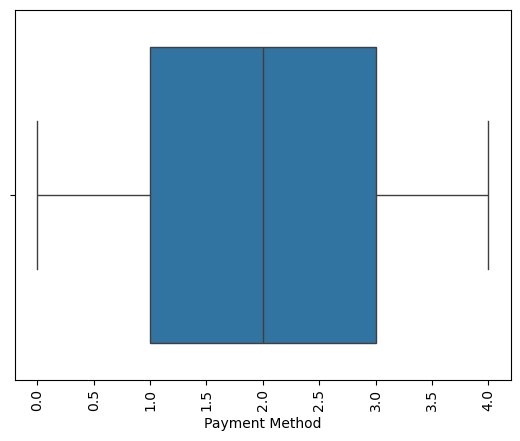

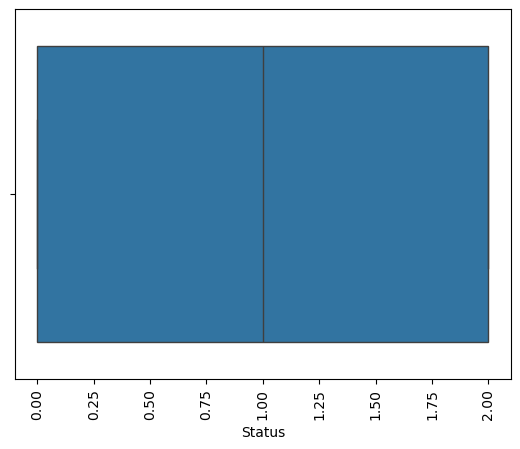

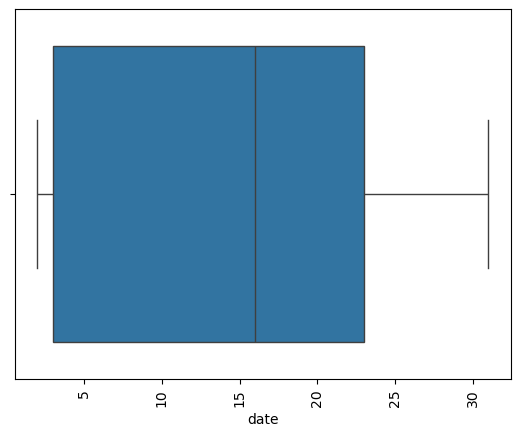

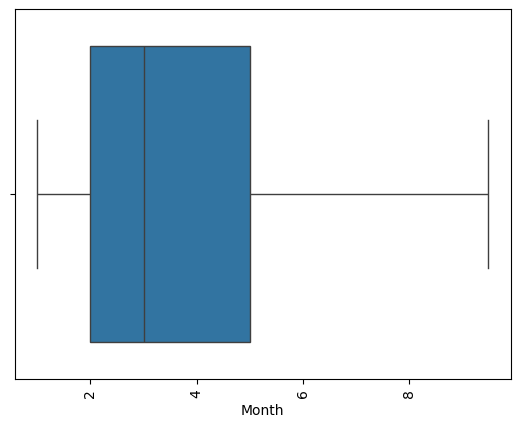

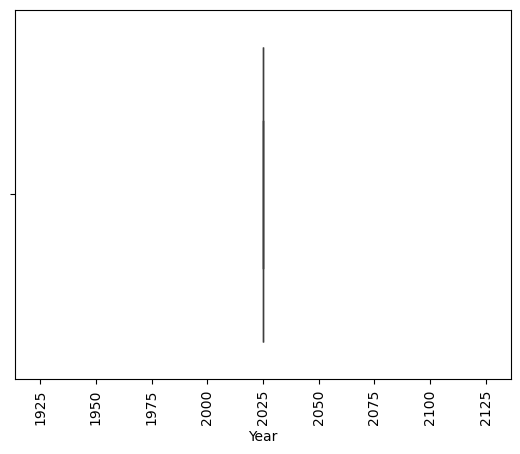

In [20]:
for i in data.select_dtypes(include=['number']).columns:
    sns.boxplot(data=data,x=i)
    plt.xticks(rotation = 90)
    plt.show()

In [21]:
X = data.drop(['Total Sales'],axis=1)
y = data['Total Sales']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [25]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [26]:
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [None, 1, 2, 3],
    'positive': [False, True]
}

In [27]:
from sklearn.model_selection import GridSearchCV
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=-1)
# Fit GridSearchCV to the training data
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 2, 3], 'positive': [False, True]})

In [28]:
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
    
# Get the best estimator
best_gbr = grid_search.best_estimator_
    
# Evaluate the best model on the test set
Test_score = best_gbr.score(X_test, y_test)
print("Test score:", Test_score)

Best parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}
Best score: 0.8628641956342689
Test score: 0.6616579968745724


In [29]:
lr = LinearRegression(copy_X= True, fit_intercept= True, n_jobs =None,positive= True)
lr.fit(X_train,y_train)

LinearRegression(positive=True)

In [30]:
y_pred = lr.predict(X_test)
y_pred

array([ 696.00031242, 1918.26380982, 3236.51583502, 1245.34722704,
        193.14002799, -396.20232809,  286.37791684, 3040.40675518,
        618.99178016, 2425.25745563,  554.57139059, 2217.28012   ,
       -124.28005796,  782.19080761, 2795.50941997,  967.5608426 ,
       1917.4240106 ,  963.77260819, 1885.17844009, -298.33424088,
        607.96332358, 1110.20723799,  682.93671466, 1933.78318676,
        442.71380851,  967.5608426 ,  716.85986737,  650.69114414,
       1743.37184392,  232.07543318, 2767.0984793 , -150.65585744,
       2767.0984793 , 1393.70417122, 3007.32138545, 1672.34316668,
        199.01181526,  618.99178016,  909.47012452,  127.58826275,
        723.54970204, 3030.21809783, -255.06021379, 1202.07319996,
       1868.43943473,  952.74415161, 1251.89757505, -155.90867049,
       -298.33424088, -439.47635518])

In [31]:
from sklearn.metrics import r2_score

In [32]:
r2_score(y_test,y_pred)

0.6616579968745724

In [33]:
lr.score(X_train,y_train)

0.8864814871764406

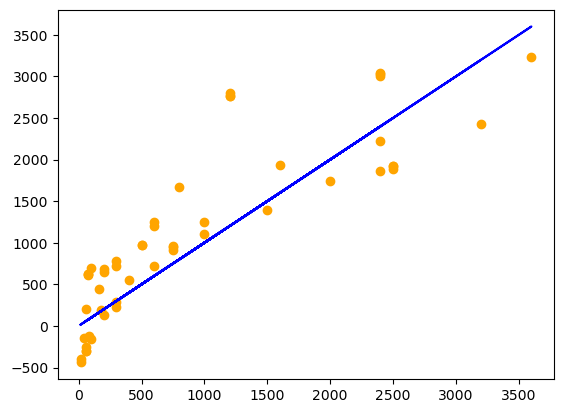

In [34]:
plt.scatter(y_test,y_pred,color='orange')
plt.plot(y_test,y_test,color='blue',lw=1.5)
plt.show();

In [36]:
import pickle
with open("fruits_model.pkl", "wb") as file:
    pickle.dump(2025, file)

print("✅ Model saved!")

✅ Model saved!
